In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0


In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [6]:
sgd = SGD(learning_rate=0.01)
adam = Adam(learning_rate=0.001)
rmsprop = RMSprop(learning_rate=0.001)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

model.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])
history_rmsprop = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 69s 36ms/step - loss: 0.5342 - accuracy: 0.8400 - val_loss: 0.1709 - val_accuracy: 0.9499
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1546 - accuracy: 0.9534 - val_loss: 0.1093 - val_accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1081 - accuracy: 0.9668 - val_loss: 0.0759 - val_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0870 - accuracy: 0.9731 - val_loss: 0.0667 - val_accuracy: 0.9780
Epoch 5/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0740 - accuracy: 0.9774 - val_loss: 0.0673 - val_accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0657 - accuracy: 0.9797 - val_loss: 0.0520 - val_accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0583 - accuracy: 0.9820 - val_loss: 0.0545 -

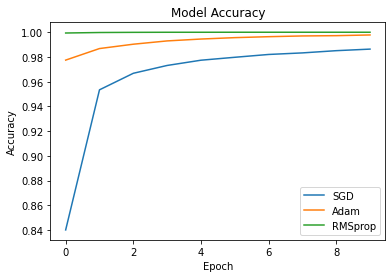

In [7]:
import matplotlib.pyplot as plt
plt.plot(history_sgd.history['accuracy'], label='SGD')
plt.plot(history_adam.history['accuracy'], label='Adam')
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()
